In [142]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [143]:
# Загрузка данных об обменном курсе
data = pd.read_csv('change4.csv')
data['date'] = pd.to_datetime(data['date'])  # Преобразование столбца "Date" в тип данных DateTime
data.set_index('date', inplace=True)  # Установка столбца "Date" в качестве индекса

In [144]:
# Разделение данных на обучающую и тестовую выборки
train_data = data['2022-01-03':'2023-01-16']
test_data = data['2023-01-17':'2023-05-16']

In [145]:
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data[['exchange_rate']])
test_data_normalized = scaler.transform(test_data[['exchange_rate']])

In [146]:
# Обучение модели ARIMA
model = ARIMA(train_data_normalized, order=(2, 1, 1))  # Параметры модели ARIMA (p, d, q)
model_fit = model.fit()

c:\Program Files\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Program Files\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [147]:
predictions = model_fit.predict(start=0, end=len(test_data_normalized)-1)

In [148]:
predictions

array([0.        , 0.42500566, 0.42501671, 0.42502651, 0.41633791,
       0.41752946, 0.41610564, 0.42187131, 0.43841917, 0.43545709,
       0.43413139, 0.44183703, 0.45620438, 0.44656562, 0.44531348,
       0.44771426, 0.44616395, 0.4471897 , 0.43652007, 0.41707908,
       0.42326929, 0.41545633, 0.41979182, 0.42212989, 0.41950008,
       0.43975071, 0.48637418, 0.49990357, 0.4857972 , 0.47041943,
       0.4721214 , 0.47446345, 0.47295143, 0.48096876, 0.48582302,
       0.48956733, 0.51275256, 0.51039413, 0.50705839, 0.52016163,
       0.51784756, 0.5254569 , 0.51533463, 0.47786945, 0.48337112,
       0.48725945, 0.48580106, 0.47805727, 0.48797998, 0.47515625,
       0.48295231, 0.48625364, 0.48216216, 0.45432658, 0.44959824,
       0.43605141, 0.43256719, 0.44306462, 0.43979787, 0.44083344,
       0.40292314, 0.39550507, 0.39725839, 0.43192101, 0.41331224,
       0.40812991, 0.41508272, 0.4674522 , 0.501391  , 0.45787481,
       0.43553833, 0.44124069, 0.44285801, 0.44180354, 0.45562

In [149]:
# Обратная нормализация прогнозов
predictions = predictions.reshape(-1, 1)
first = scaler.inverse_transform(predictions)
first

array([[416.75      ],
       [463.66000001],
       [463.66121884],
       [463.66230117],
       [462.70329682],
       [462.83481375],
       [462.67766055],
       [463.31404606],
       [465.1405157 ],
       [464.81357593],
       [464.66725225],
       [465.51776221],
       [467.10355844],
       [466.03967976],
       [465.90147558],
       [466.16646155],
       [465.99534586],
       [466.10856325],
       [464.93090293],
       [462.78510326],
       [463.46834803],
       [462.60599198],
       [463.08452267],
       [463.34258694],
       [463.05232096],
       [465.28748422],
       [470.4335506 ],
       [471.92685685],
       [470.36986547],
       [468.67254407],
       [468.86039905],
       [469.11890353],
       [468.95201366],
       [469.8369271 ],
       [470.37271558],
       [470.78599351],
       [473.34506336],
       [473.08475196],
       [472.71656992],
       [474.16283992],
       [473.90742456],
       [474.74730585],
       [473.63006024],
       [469

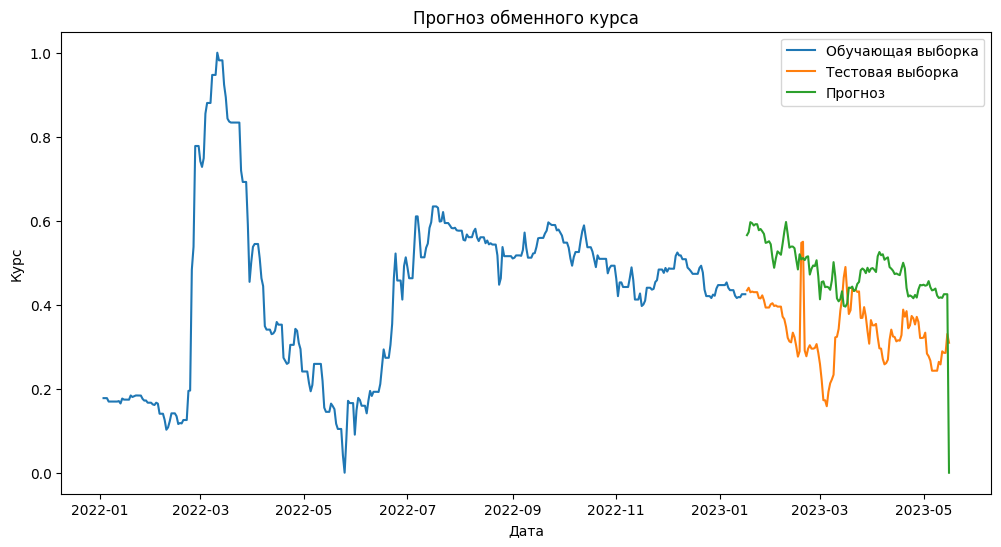

In [150]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data_normalized, label='Обучающая выборка')
plt.plot(test_data.index, test_data_normalized, label='Тестовая выборка')
plt.plot(test_data.index, predictions, label='Прогноз')
plt.legend(loc='best')
plt.title('Прогноз обменного курса')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.show()

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_data_normalized, predictions)
mse = mean_squared_error(test_data_normalized, predictions)
r2= r2_score(test_data_normalized, predictions)

print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)

MAE: 0.14954086641276068
MSE: 0.027066018902466998
R2: -4.164762250977566


In [152]:
# Reshape the arrays to be 1-dimensional
test_data_prices = test_data['exchange_rate'].values.flatten()
first = first.flatten()

In [153]:
table = pd.DataFrame({'Начальная цена': test_data['exchange_rate'].values, 'Прогноз': first})
table

,Начальная цена,Прогноз
0,450.91,416.75
1,453.21,463.66
2,448.24,463.66
3,448.25,463.66
4,448.65,462.70
...,...,...
115,464.20,481.71
116,464.36,482.32
117,464.17,482.60
118,465.36,479.96
